In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')

print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset loaded successfully
Shape: (5000, 18)

First few rows:
   AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0   68       1        1                     1              1   
1   81       1        1                     0              0   
2   58       1        1                     0              0   
3   44       0        1                     0              1   
4   72       0        1                     1              1   

   EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                      1                  0     57.831178                0   
1                      1                  1     47.694835                1   
2                      0                  0     59.577435                0   
3                      1                  0     59.785767                0   
4                      1                  1     59.733941                0   

   BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  OXYGEN_SATURATION  \
0 

In [3]:
# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Drop missing values if any
df = df.dropna()


Missing values:
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [4]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicate rows: 0


In [5]:
# Prepare features and target
X = df.drop(['PULMONARY_DISEASE'], axis=1)
y = df['PULMONARY_DISEASE']

In [6]:
# Encode target variable (YES=1, NO=0)
y = y.map({'YES': 1, 'NO': 0})

print(f"\nTarget distribution:\n{y.value_counts()}")


Target distribution:
PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Training set size: 4000
Testing set size: 1000


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
print("\nModel trained successfully")


Model trained successfully


In [11]:
# Make predictions
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

In [12]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== KNN Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


=== KNN Model Performance ===
Accuracy: 0.8710

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       571
           1       0.83      0.88      0.85       429

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



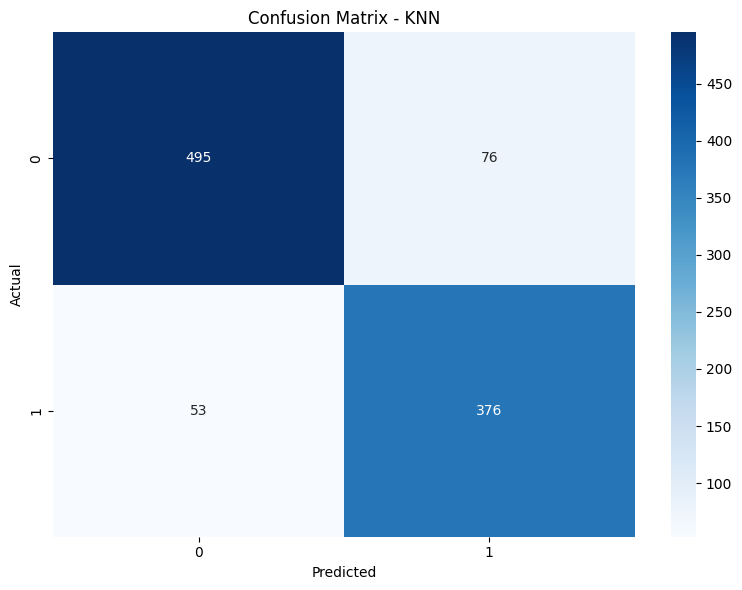

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('knn_confusion_matrix.png')
plt.show()

In [14]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

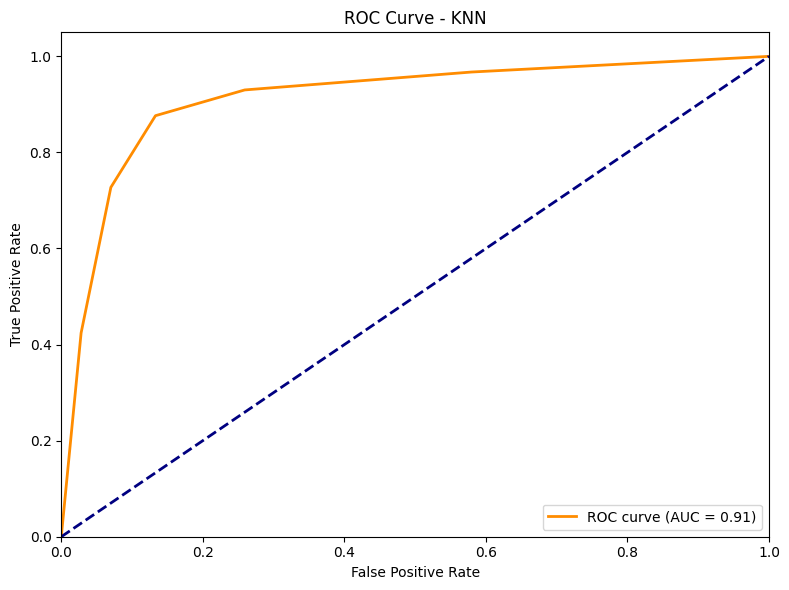

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('knn_roc_curve.png')
plt.show()

In [16]:
print(f"\nROC AUC Score: {roc_auc:.4f}")
print("\nGraphs saved successfully")


ROC AUC Score: 0.9121

Graphs saved successfully
